In [1]:
import pandas as pd
import sys
import re

sys.path.append("Users\Desktop")
white_house = pd.read_csv('2015_white_house.csv')
print(white_house.shape)

(474, 5)


In [7]:
white_house

,Name,Status,Salary,Pay Basis,Position Title,title_length
0,"Abdullah, Hasan A.",Detailee,105960,Per Annum,POLICY ADVISOR,13
1,"Abraham, Sabey M.",Employee,55000,Per Annum,ENERGY AND ENVIRONMENT DIRECTOR FOR PRESIDENTI...,52
2,"Abraham, Yohannes A.",Employee,121200,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND CHIEF O...,102
3,"Abramson, Jerry E.",Employee,155035,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DIRECTOR...,66
4,"Adler, Caroline E.",Employee,114000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,72
5,"Aiyer, Vikrum D.",Detailee,134662,Per Annum,SENIOR POLICY ADVISOR,19
6,"Alcantara, Elias",Employee,65650,Per Annum,ASSOCIATE DIRECTOR OF INTERGOVERNMENTAL AFFAIRS,43
7,"Ali, Mohammed I.",Employee,42000,Per Annum,STAFF ASSISTANT,14
8,"Allen, Angelica P.",Employee,50000,Per Annum,SPECIAL ASSISTANT TO THE DIRECTOR OF THE OFFIC...,70
9,"Allen, Elizabeth M.",Employee,103000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR MESSAGE...,48


In [2]:
print(white_house.iloc[473])

Name                                             Zients, Jeffrey D.
Status                                                     Employee
Salary                                                       173922
Pay Basis                                                 Per Annum
Position Title    ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY...
Name: 473, dtype: object


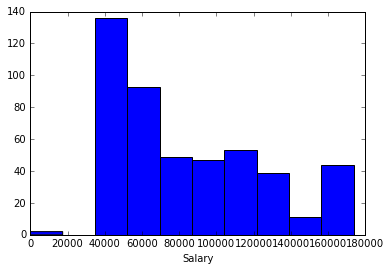

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(white_house["Salary"])
plt.xlabel('Salary')
plt.show()

Some Questions to solve with the data:
How does length of employee titles correlate to salary?
How much does the White House pay in total salary?
Who are the highest and lowest paid staffers?
What words are the most common in titles?

In [10]:
#The total amount the white house pays in staff salaries

total = white_house['Salary'].sum()

#Formatting the dollar amount
total = str(total)
print("The White House pays out a total of $", total,"annually")

The White House pays out a total of $ 40225595 annually


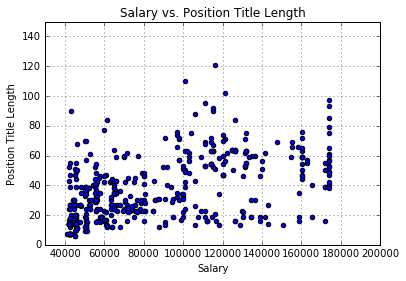

In [6]:
#Create a new column in df called "title_length" which is literally the length of their position title
position_titles = white_house['Position Title']
    
#We create a function that uses regex to substitute all white spaces in position titles to no space
def rep_spaces(string):
    return_string = re.sub(r'[^\w]', '', string)
    return return_string
    
#Now we will use a lambda function with axis=0 to remove all white spaces from the position titles column
position_titles = position_titles.apply(lambda x: rep_spaces(x))
    
#Now, we use a lambda function to create a new column in white_house called title_length
title_length_df = position_titles.apply(lambda x: len(x))
white_house['title_length'] = title_length_df

#Now making a scatter plot of salary and position title length
plt.scatter(white_house['Salary'], white_house['title_length'])
plt.title('Salary vs. Position Title Length')
plt.xlabel("Salary")
plt.xlim([30000,200000])
plt.ylabel('Position Title Length')
plt.ylim([0,150])
plt.grid()
plt.show()

In [57]:
#Here is the correlation between salary and position title length (remember that blank spaces have not been removed)

white_house[['Salary','title_length']].corr()

,Salary,title_length
Salary,1.000000,0.529095
title_length,0.529095,1.000000


We see from the cell above that there is no correlation (.533) between title length and salary, but we have to consider that the blank spaces have not been removed.
Once the blank spaces were removed, we see that the correlation actually went down (.529). This could suggest that having a longer title could have some affect on salary. However, this could just be the confounding effect of having more words in your position title.

In [63]:
#Now we are interested in looking at the top and bottom 5 paying staff positions at the white house
sorted_salary = white_house['Salary'].sort(ascending=False, inplace=False)
high_salary_indices = sorted_salary[:5].index
low_salary_indices = sorted_salary[468:473].index

C:\Users\Gerrit\Desktop\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


KeyError: 0

In [1]:
#There are two white house staffers who do not recieve any salary, as shown below
no_salary = white_house[white_house['Salary'] == 0]
print(no_salary)

NameError: name 'white_house' is not defined